# SoundVision 👁️
##### My Github:ARSALANnam(Echolyno)
##### My Email: arsalannam9710@gmail.com
##### My Linkedin:www.linkedin.com/in/arsalannam

## This project is a Music Genre Classifier built with Deep Learning (Keras & TensorFlow) using the features_3_sec.csv dataset (extracted from the GTZAN dataset). The model achieves around 91% accuracy on the test set.

## GPU Test

In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


# Import Packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix

## Read CSV

In [6]:
df = pd.read_csv("features_3_sec.csv")

# preprocessing

In [7]:
X = df.drop(columns=["filename", "length", "label"])
y = df["label"]

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y) 

# Train, Test, Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model Definition

In [11]:
model = keras.Sequential([
    keras.layers.Dense(1024, activation="relu", input_shape=(X.shape[1],)),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(y.shape[1], activation="softmax")
])

/home/desdead/tf-gpu/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1761634963.627179    1030 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3537 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


## Compile

In [12]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

## Fit

In [13]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/100


2025-10-28 10:32:51.084026: I external/local_xla/xla/service/service.cc:163] XLA service 0x7f1bac01e5d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-28 10:32:51.084049: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-10-28 10:32:51.107317: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-28 10:32:51.267891: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91200
2025-10-28 10:32:51.411060: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-28 10:32:51.

38/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1809 - loss: 2.2249

I0000 00:00:1761634975.931808    1171 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2025-10-28 10:32:56.371346: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-28 10:32:56.371579: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-28 10:32:56.371762: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set do

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.2005 - loss: 2.1760

2025-10-28 10:33:01.950092: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_77', 876 bytes spill stores, 876 bytes spill loads

2025-10-28 10:33:02.862344: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-28 10:33:03.483850: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_77', 284 bytes spill stores, 284 bytes spill loads

2025-10-28 10:33:03.680868: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_70', 472 byt

50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 176ms/step - accuracy: 0.2747 - loss: 1.9888 - val_accuracy: 0.4490 - val_loss: 1.5075
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4419 - loss: 1.5561 - val_accuracy: 0.5754 - val_loss: 1.1937
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5307 - loss: 1.3231 - val_accuracy: 0.6579 - val_loss: 1.0001
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5991 - loss: 1.1711 - val_accuracy: 0.7161 - val_loss: 0.8906
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6465 - loss: 1.0342 - val_accuracy: 0.7386 - val_loss: 0.7840
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6670 - loss: 0.9860 - val_accuracy: 0.7536 - val_loss: 0.7512
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7030 - loss: 0.8958 - val_accuracy: 0.7586 - val_loss: 0.7109
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7198 - loss: 0.8435 - val_accuracy: 0.7774 - val_loss: 

In [15]:
loss, acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", acc)
print("Test Loss:", loss)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9154 - loss: 0.3235
Test Accuracy: 0.9154154062271118
Test Loss: 0.32350629568099976


# Confusion Matrix

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


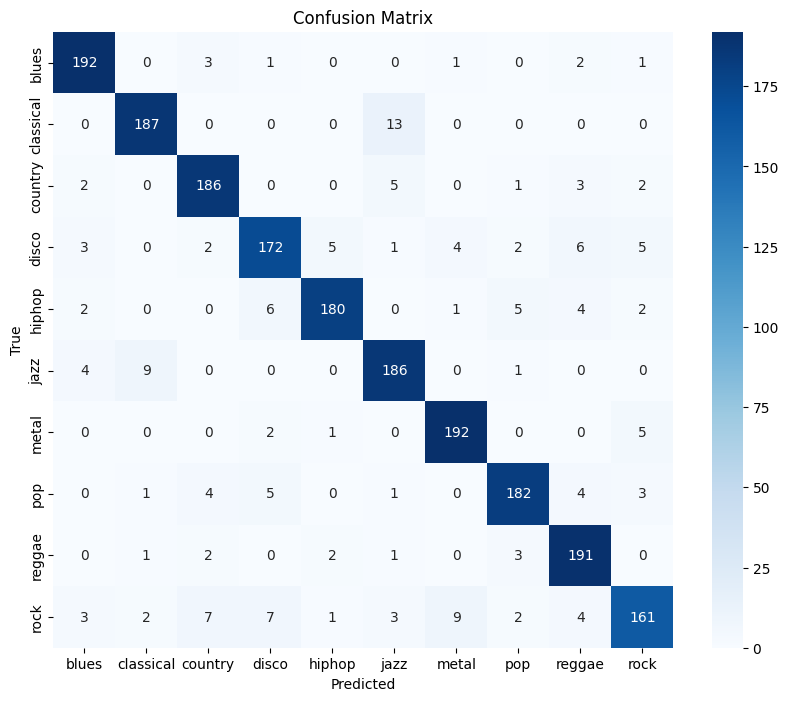

In [16]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Accuracy & Loss

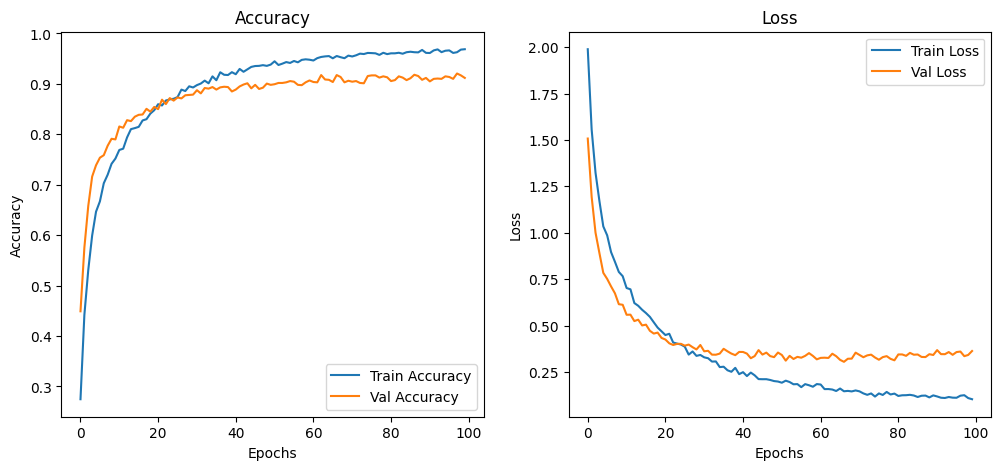

In [17]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Thank you for your Support 🤗